In [1]:
import numpy as np
import scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from classy import Class
import matplotlib
from scipy import interpolate

In [5]:
# esthetic definitions for the plots
font = {'size'   : 24, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [2]:
#Fiducial LCDM
LCDM=Class()
# LCDM.set ({'output':'mPk, dTk','P_k_max_1/Mpc':3.0,'Omega_Lambda' : 0., 'non_linear':'halofit','z_max_pk':'0.5',
#                'Omega_cdm':'0.25' ,'Omega_b':'0.05', 'background_verbose': '2', 'H0': '67.32',
#           'fluid_equation_of_state': 'CLP', 'w0_fld' : -0.99, 'wa_fld' : 0., 'e_pi' : 0.0, 'f_pi' : 0.0,
#           'log10ceff2' : -0.0, 'log10g_pi' : 0.0, 'use_ppf' : 'no', 'gauge' : 'newtonian'})

LCDM.set ({'output':'mPk, dTk','P_k_max_1/Mpc':3.0, 'non_linear':'halofit','z_max_pk':'0.5',
                'Omega_cdm':'0.25' ,'Omega_b':'0.05', 'background_verbose': '2', 'H0': '67.32'})
LCDM.compute()


cosmo1=Class()
cosmo1.set ({'output':'mPk, dTk','P_k_max_1/Mpc':3.0, 'Omega_Lambda' : 0., 'non_linear':'halofit','z_max_pk':'0.5',
               'Omega_cdm':'0.25' ,'Omega_b':'0.05', 'background_verbose': '2', 'H0': '67.32',
            'fluid_equation_of_state': 'CLP', 'w0_fld' : -0.99, 'wa_fld' : 0., 'e_pi' : 0.5, 'f_pi' : 8.0,
            'log10ceff2' : -5.0, 'log10g_pi' : 10.0, 'use_ppf' : 'no', 'gauge' : 'newtonian'})
cosmo1.compute()


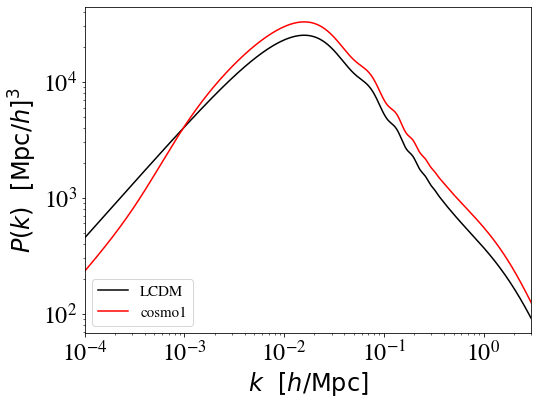

In [6]:
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk_LCDM = [] # P(k) in (Mpc/h)**3
h = LCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk_LCDM.append(LCDM.pk(k*h,0.)*h**3) # function .pk(k,z)
    
    
    
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk_cosmo1 = [] # P(k) in (Mpc/h)**3
h = cosmo1.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk_cosmo1.append(cosmo1.pk(k*h,0.)*h**3) # function .pk(k,z)
    
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')

plt.plot(kk,Pk_LCDM,'k-', label = "LCDM")
plt.plot(kk,Pk_cosmo1,'r-', label = "cosmo1")

plt.subplots_adjust(hspace=.0)
plt.legend(loc="lower left", prop={'size': 15})

In [ ]:
weyl_cosmo1 = cosmo1.get_Weyl_pk_and_k_and_z(nonlinear=False)[0][:,0] #Not sure which z this is 
k = cosmo1.get_Weyl_pk_and_k_and_z(nonlinear=False)[1]


In [ ]:
pk_lcdm = LCDM.get_pk_and_k_and_z(nonlinear=False)[0][:,0] #Not sure which z this is 
k = LCDM.get_pk_and_k_and_z(nonlinear=False)[1]

pk_cosmo1 = cosmo1.get_pk_and_k_and_z(nonlinear=False)[0][:,0] #Not sure which z this is 
k = cosmo1.get_pk_and_k_and_z(nonlinear=False)[1]


weyl_lcdm = LCDM.get_Weyl_pk_and_k_and_z(nonlinear=False)[0][:,0] #Not sure which z this is 
k = LCDM.get_Weyl_pk_and_k_and_z(nonlinear=False)[1]

weyl_cosmo1 = cosmo1.get_Weyl_pk_and_k_and_z(nonlinear=False)[0][:,0] #Not sure which z this is 
k = cosmo1.get_Weyl_pk_and_k_and_z(nonlinear=False)[1]


factor_lcdm = pk_lcdm[0]/weyl_lcdm[0]
factor_cosmo1= pk_cosmo1[0]/weyl_cosmo1[0]

plt.loglog(k,pk_lcdm,'k-', label = "matter, LCDM")
plt.loglog(k,pk_cosmo1,'r-', label = "matter, cosmo1")

plt.loglog(k,weyl_lcdm*factor_lcdm,'k-.', label = "Weyl, LCDM")
plt.loglog(k,weyl_cosmo1*factor_cosmo1,'r-.', label = "Weyl, cosmo1")


plt.legend(loc="lower left", prop={'size': 15})
